### Exercise 6: Image Transformation

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

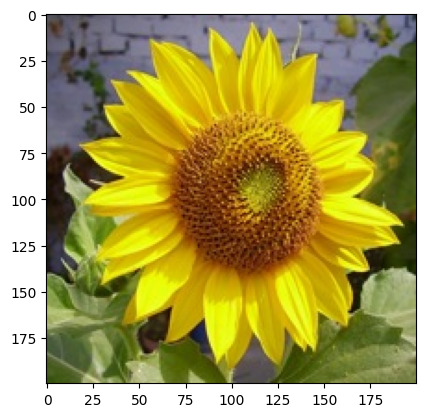

In [3]:
img = cv2.imread("images/flower.jpg")

# Change color to RGB (from BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Translation

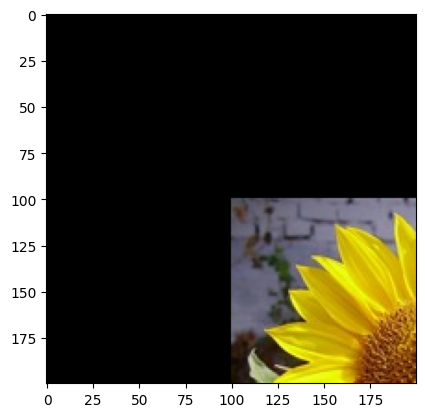

In [4]:
height , width = img_rgb.shape[:2]
Tx , Ty = height/2 , width/2

# Translation matrix T

T = np.float32( [[1,0,Tx],[0,1,Ty]] )

img_trans =  cv2.warpAffine( img_rgb, T,  (width,height) )

plt.imshow(img_trans)


### Rotation 

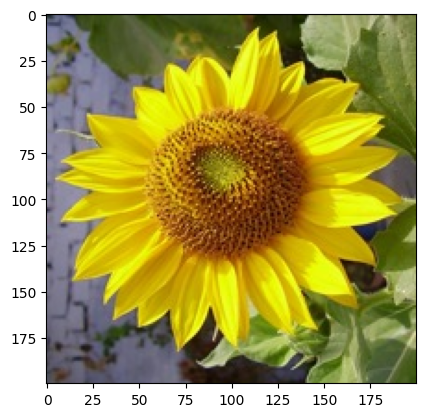

In [9]:
M = cv2.getRotationMatrix2D( (width/2,height/2), 90, 1)
img_rotated =  cv2.warpAffine(img_rgb, M , (width,height))
plt.imshow(img_rotated)


### Reflection

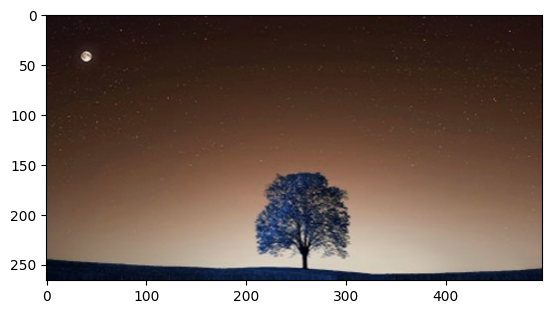

In [10]:
img_tree = cv2.imread("images/tree_sky.jpg")
plt.imshow(img_tree)

In [11]:
rows , cols = img_tree.shape[:2]

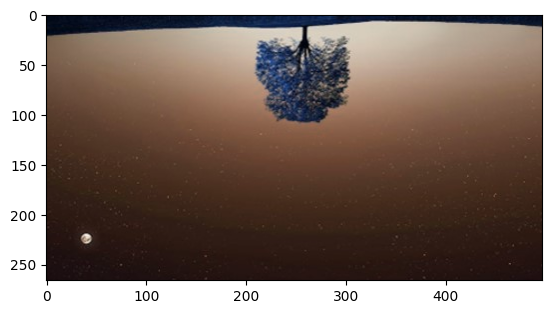

In [12]:
#cv2.flip()

## Reflection Matrix
M = np.float32([[1,  0, 0],
                [0, -1, rows],
                [0,  0, 1]])

reflected_img = cv2.warpPerspective(img_tree, M,
                                   (int(cols),
                                    int(rows)))
plt.imshow(reflected_img)

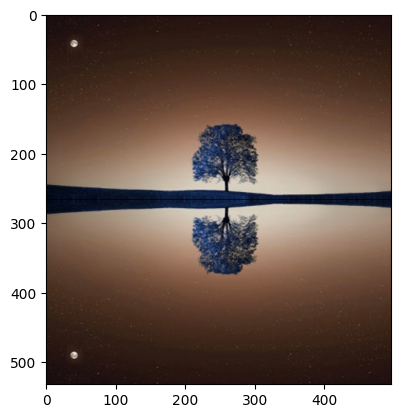

In [13]:
# Create a blank canvas to hold both images
canvas_rows = rows * 2
canvas_cols = cols
canvas = np.zeros((canvas_rows, canvas_cols, 3), dtype=np.uint8)

# Place the original image on top
canvas[:rows, :] = img_tree

# Place the reflected image at the bottom
canvas[rows:, :] = reflected_img

# Display the result
plt.imshow( canvas)